### Machine Learning Classification Modeling

 **Loading libraries**


In [98]:
# Import all the libraries that we shall be using
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

**Loading More libraries for modeling**

In [72]:
data = pd.read_csv('combined_data.csv')
data.head()

,sampleID,ITGA2,ITGA3,FAM169A,CHST9,CHST4,TMPRSS11D,TMEM213,ATP1A4,STAC2,...,vital_status,zone_of_origin,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time
0,TCGA-XJ-A83F-01,7.1755,9.7076,7.0579,1.9922,1.1318,0.0000,1.1318,0.0000,3.4759,...,LIVING,Peripheral Zone,0,1127,0.0,1127,0.0,1127.0,0,1127
1,TCGA-G9-6348-01,8.8560,10.6942,7.8310,6.0374,1.1895,0.0000,0.4008,1.5466,6.0444,...,LIVING,NaN,0,1515,0.0,1515,0.0,1515.0,0,1515
2,TCGA-CH-5766-01,9.3488,10.5992,7.1516,6.9162,1.0255,2.2621,2.0380,0.7574,4.2176,...,LIVING,Peripheral Zone,0,31,0.0,31,NaN,NaN,0,31
3,TCGA-EJ-A65G-01,8.4661,9.1272,6.7332,4.5238,0.0000,0.0000,1.4526,1.1098,2.6349,...,LIVING,NaN,0,666,0.0,666,0.0,666.0,0,666
4,TCGA-G9-6354-01,7.3447,10.3577,7.7436,5.9107,2.3167,0.6497,1.7116,0.0000,5.7215,...,LIVING,NaN,0,2066,0.0,2066,0.0,2066.0,0,2066


In [73]:
data.shape

(550, 763)

In [74]:
#check for any Null values
nulls = []
for i in data.columns:
    nulls.append(data[i].isnull().sum())
print(nulls)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [83]:
dat= data.iloc[:,1:732]

In [191]:
dat.shape

(550, 731)

In [85]:
dat.head()

,ITGA2,ITGA3,FAM169A,CHST9,CHST4,TMPRSS11D,TMEM213,ATP1A4,STAC2,MYO3A,...,TNN,RELL2,FAM111B,LOC440905,LOC145837,RAD51,LINGO3,RPL22L1,IL4I1,RGS10
0,7.1755,9.7076,7.0579,1.9922,1.1318,0.0000,1.1318,0.0000,3.4759,1.4787,...,1.7582,6.9884,6.9508,5.6220,9.5072,5.1517,3.6868,10.0287,5.6493,11.8454
1,8.8560,10.6942,7.8310,6.0374,1.1895,0.0000,0.4008,1.5466,6.0444,0.4008,...,2.4549,5.6064,5.1400,4.7168,9.5208,5.1915,0.0000,9.8089,5.0631,10.5314
2,9.3488,10.5992,7.1516,6.9162,1.0255,2.2621,2.0380,0.7574,4.2176,1.4467,...,1.9113,7.4141,5.9240,9.3108,9.1011,4.3937,2.2621,9.6614,5.7566,10.6660
3,8.4661,9.1272,6.7332,4.5238,0.0000,0.0000,1.4526,1.1098,2.6349,0.0000,...,1.4526,6.9763,6.5931,8.6541,8.4156,3.8397,2.1616,10.3102,5.3824,9.8997
4,7.3447,10.3577,7.7436,5.9107,2.3167,0.6497,1.7116,0.0000,5.7215,0.0000,...,3.0695,7.2616,4.4625,8.4732,10.5544,4.1290,2.9745,10.3267,4.9750,12.0187


In [201]:
dat= pd.DataFrame(dat)

In [86]:
y = data["CaseControl"]
print(y.shape)
y.head()

(550,)


0    Case
1    Case
2    Case
3    Case
4    Case
Name: CaseControl, dtype: object

In [88]:
y.value_counts()

Case       497
Control     53
Name: CaseControl, dtype: int64

In [89]:
# Recode label to numeric
y = y.replace({'Control':0,'Case':1})
labels = ['Control', 'Case'] # for plotting convenience later on

CategoricalDtype(categories=[6, 7, 8, 9, 10], ordered=False)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(dat, y, train_size=0.80)

In [92]:
X_train.shape

(440, 731)

In [93]:
X_test.shape

(110, 731)

In [94]:
y_train.shape

(440,)

In [96]:
y_test.shape

(110,)

array([[20.46452409, 16.61948501, -7.96956351, ...,  1.4134561 ,
        -0.18452063,  2.02965351],
       [26.61468581,  0.72820127, -0.68405319, ..., -0.85116369,
         0.54711568, -0.5565812 ],
       [22.83324848,  3.21672854, -4.3411179 , ...,  0.22582246,
         0.07547943,  1.40708967],
       ...,
       [43.07755169, -1.70399646,  2.22620733, ...,  1.35065661,
         0.14161586, -1.32990819],
       [10.47081388,  7.11841098, -6.80576256, ..., -1.74432609,
        -0.99580138, -0.63448248],
       [ 1.88583123, -3.61534162,  7.48878361, ..., -0.17595686,
        -1.23317416,  0.66186341]])

Naive Bayes accuracy: 0.882


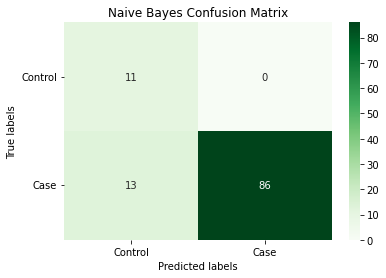

In [177]:
# Create a Gaussian classifier
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print('Naive Bayes accuracy:', round(accuracy_score(y_test, nb_pred), 3))

cm_nb =  confusion_matrix(y_test, nb_pred)

ax = plt.subplot()
sns.heatmap(cm_nb, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naive Bayes Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

**Logistic Regression Model**

Best Parameters:
 {'C': 0.01, 'penalty': 'l2'}
Logistic Regression accuracy: 1.0


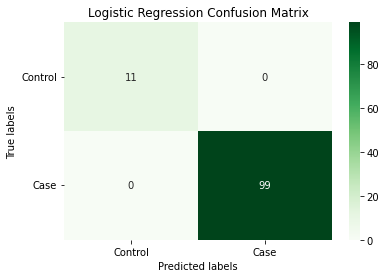

In [178]:
log_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10], 
                 'penalty': ['l1', 'l2']}

log_estimator = LogisticRegression(solver='liblinear')

log_model = GridSearchCV(estimator=log_estimator, 
                  param_grid=log_grid, 
                  cv=3,
                  scoring='accuracy')

log_model.fit(X_train, y_train)

print("Best Parameters:\n", log_model.best_params_)

# Select best log model
best_log = log_model.best_estimator_

# Make predictions using the optimised parameters
log_pred = best_log.predict(X_test)

print('Logistic Regression accuracy:', round(accuracy_score(y_test, log_pred), 3))

cm_log =  confusion_matrix(y_test, log_pred)

ax = plt.subplot()
sns.heatmap(cm_log, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

In [263]:
important = best_log.coef_[0]*100
#
sorted_ind = np.argsort(important)[::-1]
important_feat1=important[sorted_ind]
important_feat1[1:50]

c= X_train.columns[sorted_ind]
featr=important_feat1[1:50]

coln= c[1:50]

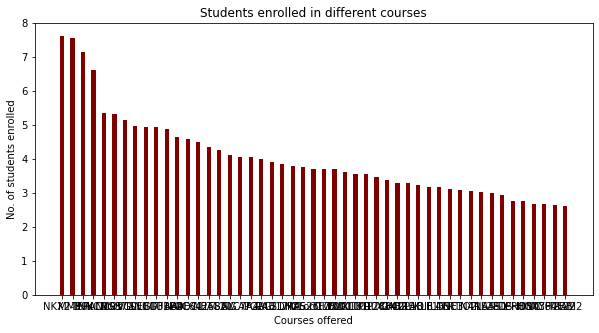

In [264]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(coln, featr, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

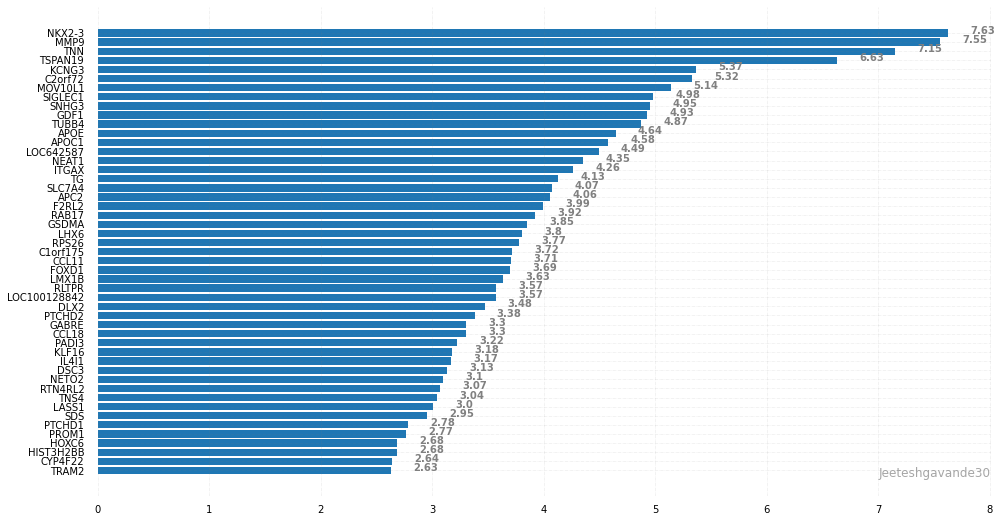

In [265]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(coln, featr)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

**SVM**

Best Parameters:
 {'C': 100, 'decision_function_shape': 'ovo', 'gamma': 1e-05, 'kernel': 'rbf'}
SVM accuracy: 0.991


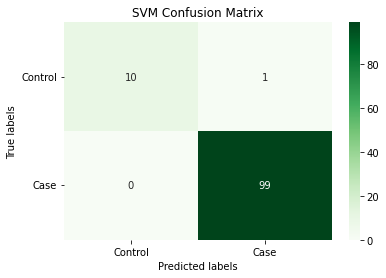

In [180]:
# Parameter grid
svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], "kernel": ["linear", "rbf", "poly"], "decision_function_shape" : ["ovo", "ovr"]} 

# Create SVM grid search classifier
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=3)

# Train the classifier
svm_grid.fit(X_train_pca, y_train)

print("Best Parameters:\n", svm_grid.best_params_)

# Select best svc
best_svc = svm_grid.best_estimator_

# Make predictions using the optimised parameters
svm_pred = best_svc.predict(X_test_pca)

print('SVM accuracy:', round(accuracy_score(y_test, svm_pred), 3))

cm_svm =  confusion_matrix(y_test, svm_pred)

ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax, fmt='g', cmap='Greens') 

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);


**Random Forest**

Best Parameters:
 {'bootstrap': False, 'max_features': 0.6, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 60}
Random Forest accuracy: 0.982


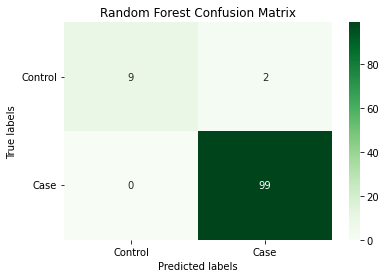

In [183]:
# Hyperparameters search grid 
rf_param_grid = {'bootstrap': [False, True],
         'n_estimators': [60,100],
         'max_features': [0.6,0.8],
         'min_samples_leaf': [8, 14],
         'min_samples_split': [3, 7]
        }

# Instantiate random forest classifier
rf_estimator = RandomForestClassifier(random_state=0)

# Create the GridSearchCV object
rf_model = GridSearchCV(estimator=rf_estimator, param_grid=rf_param_grid, cv=3, scoring='accuracy')

# Fine-tune the hyperparameters
rf_model.fit(X_train, y_train)

print("Best Parameters:\n", rf_model.best_params_)

# Get the best model
rf_model_best = rf_model.best_estimator_

# Make predictions using the optimised parameters
rf_pred = rf_model_best.predict(X_test)

print('Random Forest accuracy:', round(accuracy_score(y_test, rf_pred), 3))

cm_rf = confusion_matrix(y_test, rf_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

<BarContainer object of 731 artists>

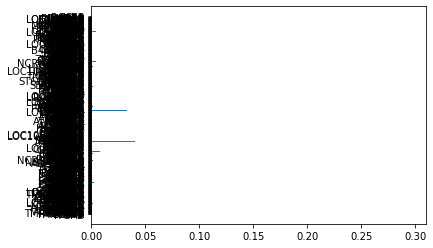

In [197]:
plt.barh(dat.columns,rf_model_best.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

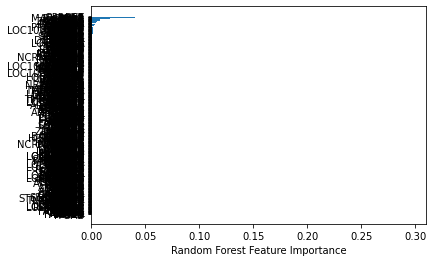

In [217]:
sorted_idx = rf_model_best.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf_model_best.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


In [241]:
importances = rf_model_best.feature_importances_*100
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
important_feat=importances[sorted_indices]
important_feat[1:50]

col= X_train.columns[sorted_indices]
feat=important_feat[1:50]

colmn= col[1:50]

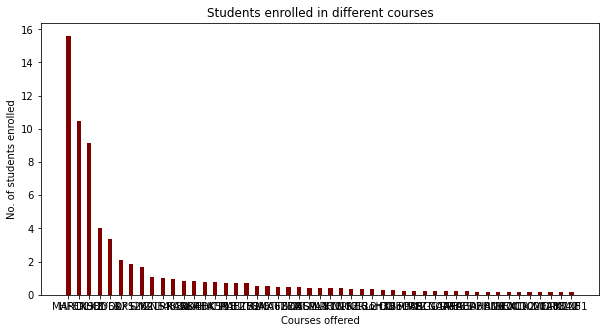

In [242]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(colmn, feat, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

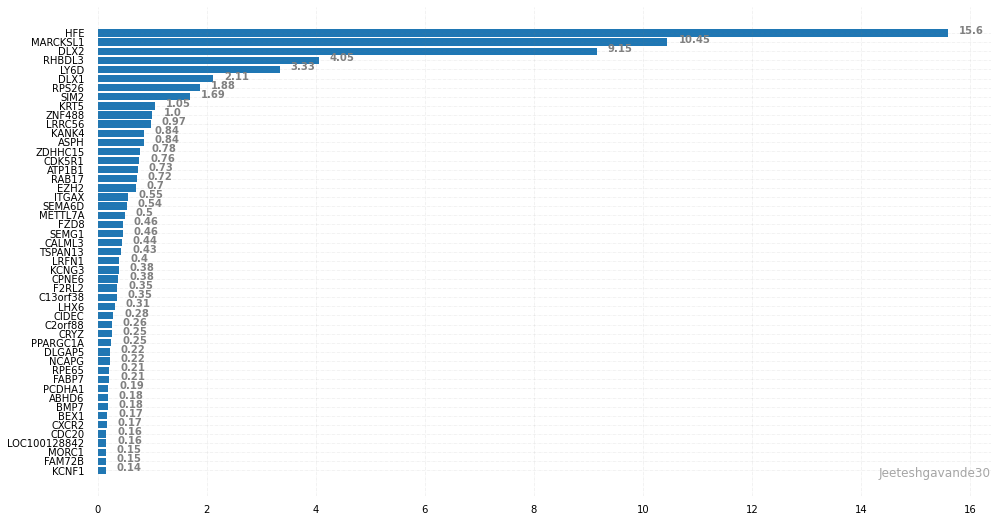

In [243]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(colmn, feat)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

**Decision Tree**

In [271]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)

In [278]:
# Sort the feature importance in descending order
#
s_indx = np.argsort(feat_importance)[::-1]
i_feat=feat_importance[s_indx]
i_feat[1:50]

co= X_train.columns[s_indx]
im_feat=i_feat[1:50]

c_l= co[1:50]

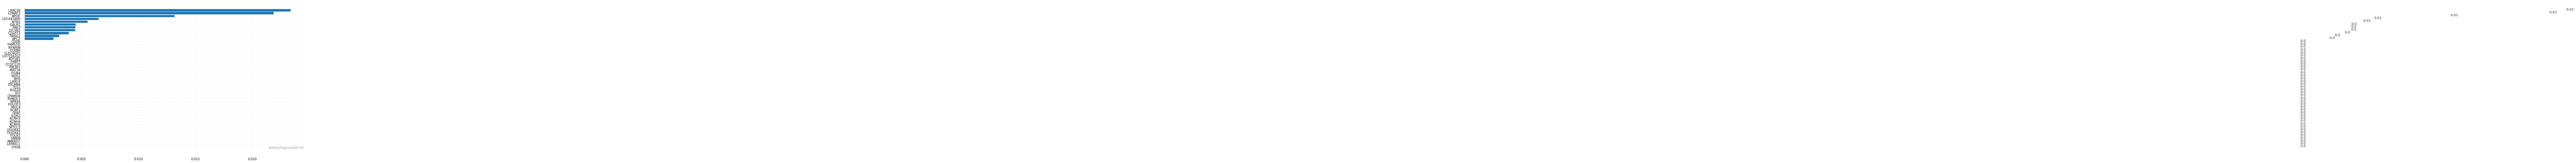

In [279]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(c_l, im_feat)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

**LASSO**

In [288]:
log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(dat, y)

LogisticRegression(penalty='l1', solver='liblinear')

In [289]:
important1 = log.coef_[0]*100
#
sorted_ind = np.argsort(important1)[::-1]
important_feat2=important[sorted_ind]
important_feat2[1:50]

c1= X_train.columns[sorted_ind]
featr1=important_feat2[1:50]

coln1= c1[1:50]

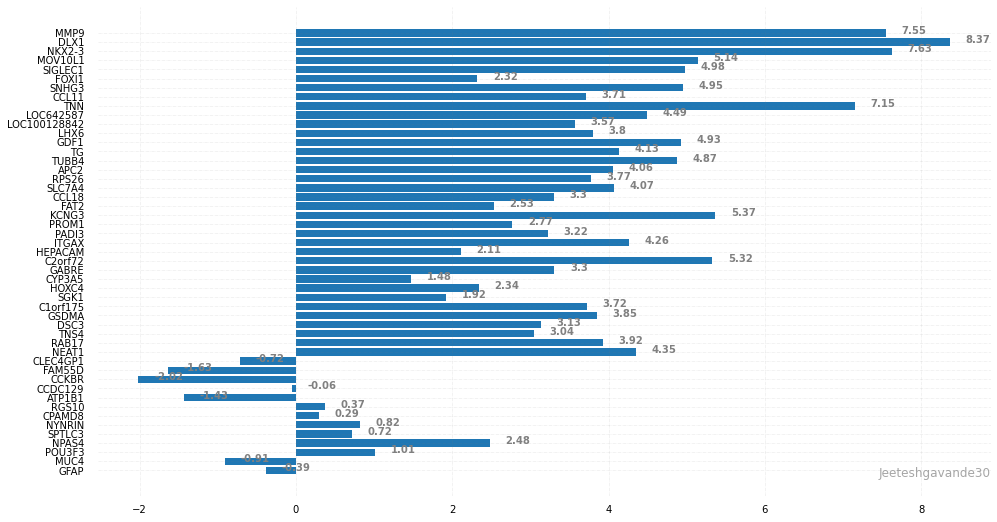

In [292]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(coln1, featr1)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [295]:

common_gene= set(c[1:50]).intersection(col[1:50])

common_gene

{'DLX2', 'F2RL2', 'ITGAX', 'KCNG3', 'LHX6', 'LOC100128842', 'RAB17', 'RPS26'}